# Session 1
## Experiment 1
### Lab

**After finishing this Experiment, please go over to the LMS, and answer the Check For Understanding Questions under Experiment 1.**

In this experiment, we will use the data set on fruits which we explored earlier and learn how a simple K nearest neighbour classification works. 

Let us consider a simple situation. Given some data about a fruit, we want to label it automatically.

Fruits are characterized by 
 * weight in grams as a float
 * colour as an integer
     - 1 $\rightarrow$ red
     - 2 $\rightarrow$ orange
     - 3 $\rightarrow$ yellow
     - 4 $\rightarrow$ green
     - 5 $\rightarrow$ blue
     - 6 $\rightarrow$ purple
 * label as a string
     - "A" $\rightarrow$ Apple
     - "B" $\rightarrow$ Banana
     
We are given some sample data such as (303, 3, "A") meaning the fruit with 303 gram weight, and yellow colour is an apple. A set of such *training examples* is given in “01-train.csv”. This has a small set of 17 **labeled** examples. 

We are given a set of **test** data where only weight and colour are given,  eg. (373,1). We should design a simple Nearest Neighbour classifier that will find the fruit label. i.e., "A" or "B", meaning Apple or Banana. 

We have 102 such testcases. We are also given additional files which have the correct labels for all the 102 test cases. If your predicted label is correct, you have done well!

Here are the details of all the files:
  * 01-train.csv $\Rightarrow$ The original input data. 
    - 18 lines
    - the first line is a header
    - each of the remaining 17 lines has three pieces of data:
       * weight in grams :: float
       * colour code :: 1, 2, 3, 4, 5 
       * label :: "A", "B"
  * 01-test1.csv $\Rightarrow$ The first test data set.
    - 31 lines
    - the first line is a header
    - each of the remaining 30 lines has two pieces of data
       * weight in grams :: float
       * colour code :: 1, 2, 3, 4, 5
  * 01-test1-labels.csv $\Rightarrow$ The labels for test data set above. That is, each line has just the correct label.
  * 01-test1-labelled.csv $\Rightarrow$ The above two files combined. 
  * 01-test2.csv $\Rightarrow$ The second test data set. Similar to the first data set, except that it has 73 lines.
  * 01-test2-labels.csv $\Rightarrow$ The labels for test data set above. That is, each line has just the correct label.
  * 01-test2-labelled.csv $\Rightarrow$ The above two files combined. 

In [ ]:
# Let us first read the data from the file and do a quick visualization
import pandas as pd
train = pd.read_csv("01-train.csv")
train

,Weight,Colour,Label
0,303,3,B
1,370,1,A
2,298,3,B
3,277,3,B
4,377,4,A
5,299,3,B
6,382,1,A
7,374,4,A
8,303,4,B
9,309,3,B


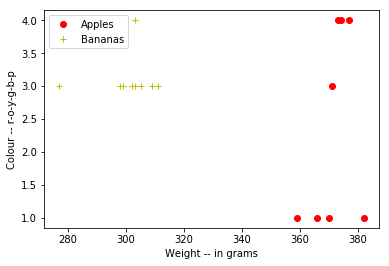

In [ ]:
apples = train[train.Label == "A"]
bananas = train[train.Label == "B"]
import matplotlib.pyplot as plt
plt.plot(apples.Weight, apples.Colour, "ro")
plt.plot(bananas.Weight, bananas.Colour, "y+")
plt.xlabel("Weight -- in grams")
plt.ylabel("Colour -- r-o-y-g-b-p")
plt.legend(["Apples", "Bananas"])
plt.show()

We  see that similar fruits come close in the feature (weight, color) space? Now let us plot one sample data given in black.

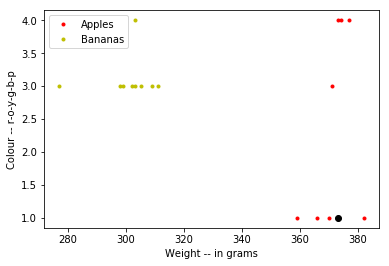

In [ ]:
plt.plot(apples.Weight, apples.Colour, "ro")
plt.plot(bananas.Weight, bananas.Colour, "y+")
plt.xlabel("Weight -- in grams")
plt.ylabel("Colour -- r-o-y-g-b-p")
plt.legend(["Apples", "Bananas"])
plt.plot([373], [1], "ko")
plt.show()

From the visualization alone, we can infer that the unknown fruit is likely to be an apple. 

The job now is to instead of eyeballing it one at a time like above, use a kNN classifier with, say, $k = 3$ and using the *Euclidean* distance, to determine the correct label for the data in the file "01-test1.csv" that has 30 data points. 

Let us first write a distance function to calculate the *Euclidean* distance between two fruits.

In [ ]:
import math
def dist(a, b):
    sqSum = 0
    for i in range(len(a)):
        sqSum += (a[i] - b[i]) ** 2
    return math.sqrt(sqSum)

Now let us write code to find the $k$ nearest neighbours of a given fruit

In [ ]:
def kNN(k, train, given):
    distances = []
    for t in train.values:              
        # loop over all training samples
        distances.append((dist(t[:2], given), t[2])) 
        # compute and store distances with respect to each training sample
    distances.sort()            
    return distances[:k]    # return first k samples = nearest  k distances to the given sample

In [ ]:
print(kNN(3, train, (373, 1)))
print(kNN(5, train, (373, 1)))

[(2.8284271247461903, 'A'), (3.0, 'A'), (3.0, 'A')]
[(2.8284271247461903, 'A'), (3.0, 'A'), (3.0, 'A'), (3.1622776601683795, 'A'), (5.0, 'A')]


As you can see above, the 3 (and 5) nearest neighbours of the fruit with the characteristics (373, 1) are all Apples -- label 1; which is what we visually saw when we plotted the point as a black spot in the chart. Of course we need to write another function to get this attribute rather than read, so we have written a function for that. We have used collections.Counter, which is a very useful python library. More detail are at:

 * https://docs.python.org/3/library/collections.html#collections.Counter 

In [ ]:
import collections
def kNNmax(k, train, given):
    tally = collections.Counter()
    for nn in kNN(k, train, given):
        tally.update(nn[-1])
    return tally.most_common(1)[0]
print(kNNmax(5, train, (340, 1)))
print(kNNmax(7, train, (340, 1)))

('A', 4)
('A', 5)


This shows that of the five nearest neighbours to (340, 1) four are Apples and of the seven nearest, five are Apples 

Now let us load the test data and find the labels for all of them 

In [ ]:
testData1 = pd.read_csv('01-test1.csv').values
for t in testData1:
    print(t, kNNmax(3, train, t)[0])

[ 318.1    3. ] B
[ 293.8    3. ] B
[ 277.3    2. ] B
[ 324.2    4. ] B
[ 327.    2.] B
[ 281.5    3. ] B
[ 386.8    1. ] A
[ 377.8    2. ] A
[ 401.1    1. ] A
[ 399.5    1. ] A
[ 387.3    1. ] A
[ 361.9    2. ] A
[ 293.6    3. ] B
[ 309.1    3. ] B
[ 276.2    3. ] B
[ 303.3    3. ] B
[ 274.6    3. ] B
[ 327.2    3. ] B
[ 274.    3.] B
[ 269.2    3. ] B
[ 265.1    3. ] B
[ 300.7    3. ] B
[ 282.1    3. ] B
[ 274.6    3. ] B
[ 357.2    4. ] A
[ 405.7    4. ] A
[ 377.8    4. ] A
[ 401.7    4. ] A
[ 342.2    4. ] A
[ 397.4    4. ] A


Let us count how many are correct, instead of displaying the results

In [ ]:
testData = pd.read_csv('01-test1.csv').values
testResults = pd.read_csv('01-test1-labels.csv').values.flatten()
results = []
for i, t in enumerate(testData):
    results.append(kNNmax(3, train, t)[0] == testResults[i])
print(results.count(True), "are correct")

30 are correct


**Exercise 1** :: Find the accuracy of your prediction -- percentage of the samples that are correctly predicted.

**Exercise 2** :: Predict the labels for the larger file "01-test2.csv" that has 72 data points

Note that with 17 samples we are predicting (rather accurately) the labels on a larger level

**Exercise 3** :: Find the accuracy of the prediction by comparing with "01-test2-labels.csv" 

**Exercise 4** :: Repeat the above experiment with $k = 5$ and $k = 7$. Explain which $k$ is better and why?

**Exercise 5** :: Repeat the above experiment with $k = 17$. What do you think is happening?

**Exercise 6** :: If the weights are in Kgs, that is divide all of the data in weights column by 1000, what is the accuracy for $k = 3$

**Exercise 7** :: Modify the distance function to ignore the colour feature. Calculate the accuracy on "01-test1.csv"

**Exercise 8** :: If we used the square of the Euclidean distance, for the distance fuction does it affect the accuracy?

**Exercise 9** :: If we use the sum of the absolute differences, as the distance metric instead of the Euclidean, how does that affect the accuracy?

## Acknowledgment
This experiment is based on the blog post http://www.jiaaro.com/KNN-for-humans. 

## Summary
In the above experiment, we find that a simple nearest neighbour method can successfully predict labels with a small number of labelled examples. But we also see that the results can go really wrong if we make some wrong choices (like weight in Kg, or a very large K). This should remind you about the practical expertise and experimental skills that will become equally important as we move forward.